# Project 7 - Model explaination

**Author: Linh Nguyen**<br>

**StudentID: 23161711**<br>

**Date: Sep 2022**

## 1. Load data and import package

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone_project

Mounted at /content/drive
/content/drive/MyDrive/Capstone_project


In [1]:
!pip install tensorflow==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 13 kB/s 
     |████████████████████████████████| 132 kB 62.8 MB/s 
     |████████████████████████████████| 2.9 MB 51.7 MB/s 
     |████████████████████████████████| 3.8 MB 48.2 MB/s 
     |████████████████████████████████| 462 kB 58.6 MB/s 
     |████████████████████████████████| 14.8 MB 52.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68715 sha256=66844cd18c5305253e70b0a63da322a2b7f26b5bbf88665717c7150c6d3adb23
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [45]:
import numpy as np
import pandas as pd
import re
from tensorflow import keras
#from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import  tensorflow as tf
#from gensim.models import KeyedVectors
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
tf.compat.v1.disable_v2_behavior()



In [3]:
! ls /content/drive/MyDrive/Capstone_project/raw

diagnosis.csv  icd9toicd10cmgem.csv  pyxis.csv	 vitalsign.csv
edstays.csv    medrecon.csv	     triage.csv


In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.4.0'

In [21]:
edstay_ad1 = pd.read_csv('edstay_ad1.csv')
edstay_ad1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428284 entries, 0 to 428283
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   arrival_transport              428284 non-null  object 
 1   historical_stay_status         428284 non-null  object 
 2   historical_stay_length_in_day  428284 non-null  float64
 3   temperature                    428284 non-null  float64
 4   heartrate                      428284 non-null  float64
 5   resprate                       428284 non-null  float64
 6   o2sat                          428284 non-null  float64
 7   sbp                            428284 non-null  float64
 8   dbp                            428284 non-null  float64
 9   acuity                         428284 non-null  float64
 10  temperaturemissing             428284 non-null  int64  
 11  heartratemissing               428284 non-null  int64  
 12  respratemissing               

In [22]:
num_attr = edstay_ad1.select_dtypes(include=['float64']).columns
cat_attr = edstay_ad1.select_dtypes(include=['O']).columns

In [23]:
trans_pip = ColumnTransformer([
    ("num",StandardScaler(), num_attr),
    ("cat",OneHotEncoder(),cat_attr)
],remainder='passthrough')

In [24]:
train_samples_o = pd.read_csv('train_samples_o.csv')
train_samples_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299799 entries, 0 to 299798
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   arrival_transport              299799 non-null  object 
 1   historical_stay_status         299799 non-null  object 
 2   historical_stay_length_in_day  299799 non-null  float64
 3   temperature                    299799 non-null  float64
 4   heartrate                      299799 non-null  float64
 5   resprate                       299799 non-null  float64
 6   o2sat                          299799 non-null  float64
 7   sbp                            299799 non-null  float64
 8   dbp                            299799 non-null  float64
 9   acuity                         299799 non-null  float64
 10  temperaturemissing             299799 non-null  int64  
 11  heartratemissing               299799 non-null  int64  
 12  respratemissing               

In [25]:
trans_pip.fit_transform(train_samples_o)

array([[-2.79447380e-01,  4.48122197e-01,  1.35118894e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.79447380e-01, -4.44662244e-03, -1.97339327e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.79447380e-01, -4.44662244e-03, -1.18348018e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.79447380e-01,  5.58958869e-02, -7.33718543e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.79447380e-01,  8.60671415e-02, -1.18348018e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.03583122e-01,  9.61033527e-01,  1.91467745e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [48]:
loaded_1 = keras.models.load_model("/content/drive/MyDrive/Capstone_project/model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
x_test_o = pd.read_csv("x_test_o.csv").to_numpy()
x_test_his = pd.read_csv("x_test_his.csv").to_numpy()
x_test = pd.read_csv("x_test.csv").to_numpy()

test_samples_his = pd.read_csv("test_samples_his.csv")
test_samples_chief = pd.read_csv("test_samples_chief.csv")

In [50]:
x_test_o[0].shape

(23,)

In [51]:
loaded_1.predict(x=[x_test_o[1:2],x_test_his[1:2], x_test[1:2]])

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


array([[0.03657476]], dtype=float32)

In [31]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [52]:
import shap

explainer = shap.DeepExplainer(loaded_1, [x_test_o[:1000],x_test_his[:1000],x_test[:1000]])


In [33]:
feature_names = list(trans_pip.get_feature_names_out())

In [34]:
feature_names.extend(['his_icd_1','his_icd_2','his_icd_3','his_icd_4','his_icd_5','chief_1','chief_2','chief_3','chief_4','chief_5'])

In [35]:
len(feature_names)

33

In [38]:
explainer

In [42]:
x_test_o[:1]

array([[-0.27944738,  0.26709467,  2.25277056,  0.16544151, -0.4662586 ,
        -0.5151856 ,  0.01734985, -0.885889  ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [54]:
shap.initjs()

shap_values1 = explainer.shap_values([x_test_o[:1],x_test_his[:1],x_test[:1]])

shap.force_plot(explainer.expected_value[0], np.concatenate([shap_values1[0][0], shap_values1[0][1], shap_values1[0][2]], axis=1), feature_names = feature_names)

In [76]:
test_samples_chief[:1].astype(str).values.tolist()[0][0].split(",")[:2]

['fever ', ' weakness ']

In [80]:
shap.initjs()

shap_values1 = explainer.shap_values([x_test_o[1:2],x_test_his[1:2],x_test[1:2]])

shap.force_plot(explainer.expected_value[0], np.concatenate([shap_values1[0][0], shap_values1[0][1], shap_values1[0][2]], axis=1), feature_names = feature_names)


In [81]:
test_samples_chief[1:2].astype(str).values.tolist()[0][0].split(",")

['back pain ', ' neck pain ', ' headache']

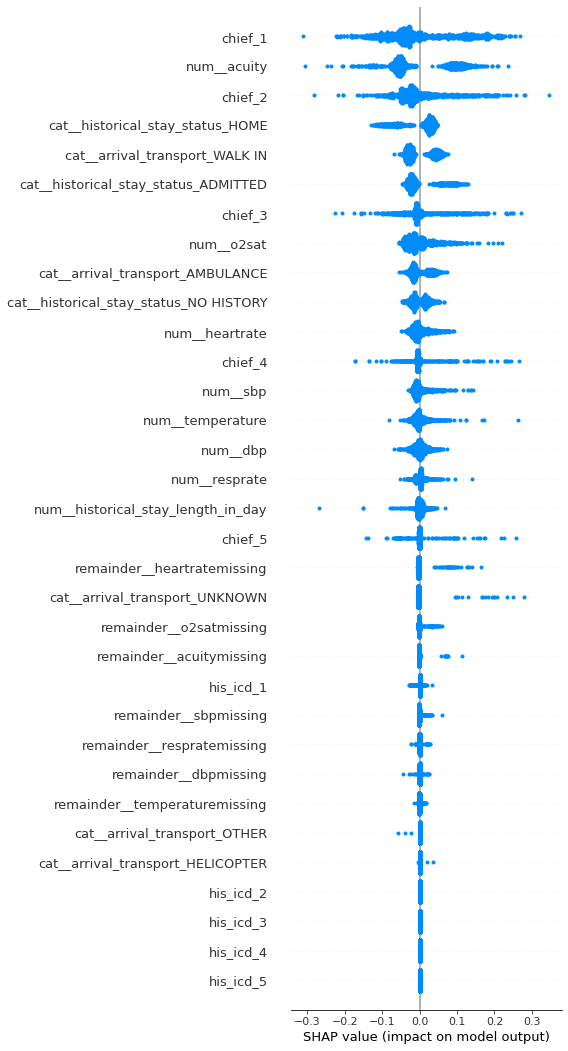

In [84]:
shap_values = explainer.shap_values([x_test_o[:1000],x_test_his[:1000],x_test[:1000]])
shap.summary_plot(np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1), feature_names = feature_names, max_display = 40)

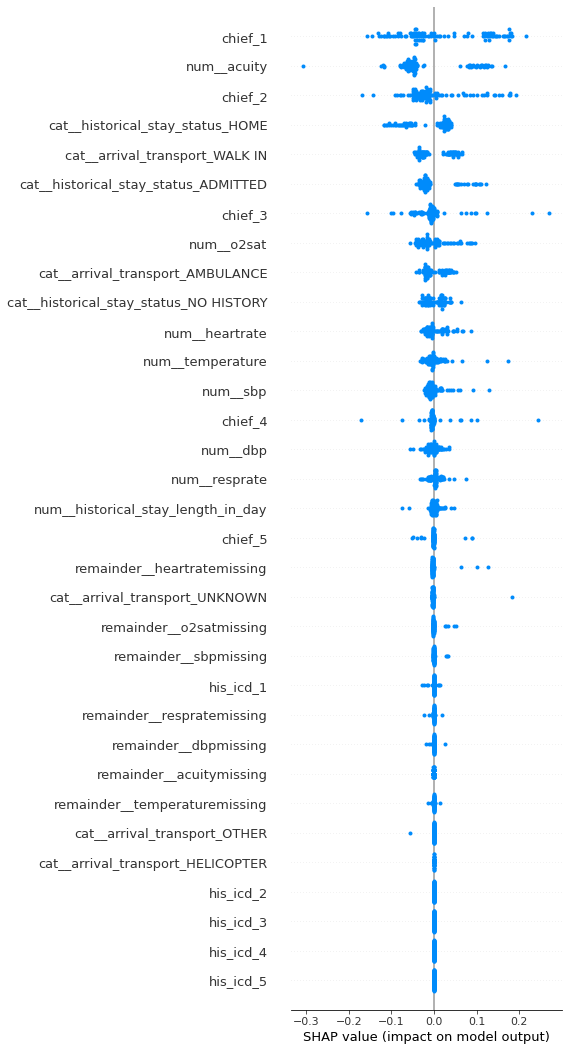

In [83]:
shap.summary_plot(np.concatenate([shap_values[0][0], shap_values[0][1], shap_values[0][2]], axis=1), feature_names = feature_names, max_display = 40)